In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/media/beans/ssd/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
get_obs_per_sec()

In [ ]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

In [3]:
set_should_stop(True)

In [4]:
dataloader = BlenderDataloader("trn", 32)

In [5]:
dataloader.get_obs_per_second()

110.796196

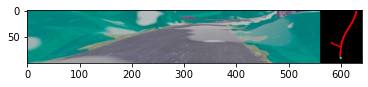

In [11]:
ix = 4
plt.imshow(dataloader.img_chunk[ix][0])

(array([ 44., 245., 422., 653., 743., 810., 372., 329.,  57.,  37.]),
 array([26.81362 , 32.81353 , 38.81344 , 44.813347, 50.813255, 56.813168,
        62.813076, 68.81299 , 74.8129  , 80.812805, 86.81271 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

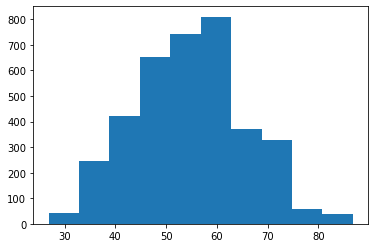

In [7]:
plt.hist(dataloader.aux_chunk[:,:,2].flatten())

(array([  58.,  156.,  458., 1220.,  993.,  689.,  101.,   20.,    6.,
          11.]),
 array([-0.20209934, -0.15184289, -0.10158645, -0.05133002, -0.00107357,
         0.04918287,  0.09943931,  0.14969575,  0.1999522 ,  0.25020865,
         0.30046508], dtype=float32),
 <BarContainer object of 10 artists>)

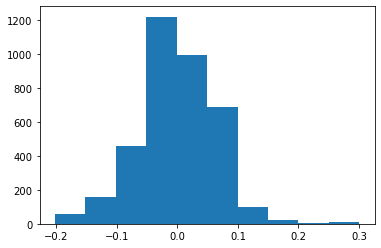

In [8]:
plt.hist(dataloader.targets_chunk[:,:,14].flatten())

In [9]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(img, 
                                    aux, 
                                    wp_angles,
                                     wp_headings,
                                     wp_curvatures,
                                     to_pred_mask,
                                    current_tire_angles_rad, # Extras
                                    current_speeds_mps, 
                                    pitch, 
                                    yaw) = batch

is_first_in_seq

CPU times: user 919 µs, sys: 0 ns, total: 919 µs
Wall time: 1.91 ms


True

In [10]:
wp_angles.shape, wp_headings.shape, wp_curvatures.shape

(torch.Size([32, 9, 30]), torch.Size([32, 9, 30]), torch.Size([32, 9, 30]))

(array([ 113.,  456., 2223., 9196., 2566., 1304.,  827.,  425.,  119.,
          51.]),
 array([-2.883 , -2.066 , -1.251 , -0.4348,  0.3813,  1.197 ,  2.014 ,
         2.83  ,  3.645 ,  4.46  ,  5.277 ], dtype=float16),
 <BarContainer object of 10 artists>)

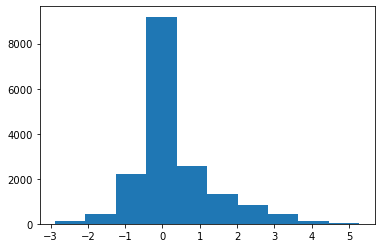

In [46]:
plt.hist((wp_angles*to_pred_mask).flatten().detach().cpu().numpy())

In [54]:
3.3*.54

1.782

(array([  16.,   90.,  505., 3027., 9853., 1779., 1425.,  435.,   85.,
          65.]),
 array([-5.066 , -3.883 , -2.697 , -1.514 , -0.3289,  0.8555,  2.04  ,
         3.225 ,  4.41  ,  5.594 ,  6.777 ], dtype=float16),
 <BarContainer object of 10 artists>)

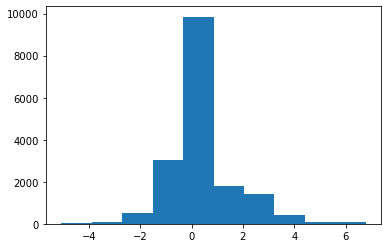

In [47]:
plt.hist((wp_headings*to_pred_mask).flatten().detach().cpu().numpy())

(array([  149.,   688.,  2620., 10216.,  1754.,  1274.,   414.,    76.,
           20.,    69.]),
 array([-0.991 , -0.687 , -0.3823, -0.078 ,  0.2263,  0.531 ,  0.835 ,
         1.14  ,  1.444 ,  1.748 ,  2.053 ], dtype=float16),
 <BarContainer object of 10 artists>)

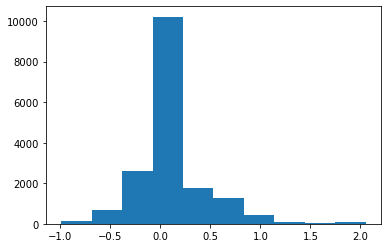

In [48]:
plt.hist((wp_curvatures*to_pred_mask).flatten().detach().cpu().numpy())

In [35]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.8145, device='cuda:0', dtype=torch.float16)

In [36]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

IndexError: index 9 is out of bounds for axis 1 with size 9

In [49]:
abs(t).max()

tensor(3904., device='cuda:0', dtype=torch.float16)

(array([161.,  60.,  19.,   8.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([  0. ,  62.6, 125.2, 187.8, 250.4, 313. , 375.5, 438.2, 500.8,
        563.5, 626. ], dtype=float16),
 <BarContainer object of 10 artists>)

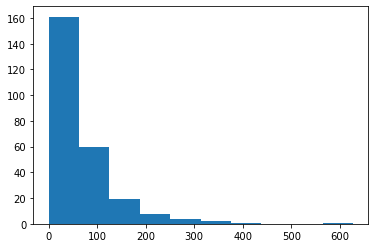

In [50]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [51]:
abs(td).max()

tensor(626., device='cuda:0', dtype=torch.float16)

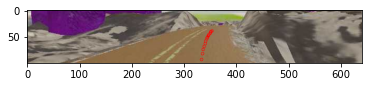

In [67]:

traj = dataloader.targets_chunk[ix][0]
img = dataloader.img_chunk[ix][0]

plt.imshow(draw_wps(img, traj))

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)